# lattice

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Helpers

In [2]:
def gen_lattice(S0, u, d, N, dt):
    """generates a binomial lattice
    
    for a given up, down, start value and number of steps (N).
    Resulting lattice has N+1 levels.
    """
    t = [0.]
    S = [float(S0)]

    for i in range(1, N+1):
        for j in range(0, i+1):
            t.append(dt*i)
            S.append( S0 * d**j * u**(i-j) )

    return np.array(t), np.array(S)


def model_params(r, T, sigma, N):
    dt = T / N
    df = m.exp(r * dt)

    u = m.exp(sigma * m.sqrt(dt))
    d = 1 / u
    q = ( m.exp(r * dt) - d ) / (u - d)
    
    return dt, df, u, d, q

$0 < d < e^{r \Delta t} < u$

$u = e^{ \sigma \sqrt{ \Delta t } }$

$d = \frac{1}{u}$

$q = \frac{e^{r \Delta t} - d}{u - d}$ - вероятность движения вверх на каждом шаге

In [3]:
# parameters
S0 = 100.
T = 3.
r = 0.1
sigma = 0.15

dt, df, u, d, p = model_params(r, T, sigma, N=3)

gen_lattice(S0, N=3, u=u, d=d, dt=dt)

(array([0., 1., 1., 2., 2., 2., 3., 3., 3., 3.]),
 array([100.        , 116.18342427,  86.07079764, 134.98588076,
        100.        ,  74.08182207, 156.83121855, 116.18342427,
         86.07079764,  63.76281516]))

## Код для визуализации решетки

df: 1.1051709180756477, u:1.161834242728283, d:0.8607079764250578, p:0.8118286878515704
N=3, size=4
B[-1]: 134.98588075760034
maxS : 156.83121854901685


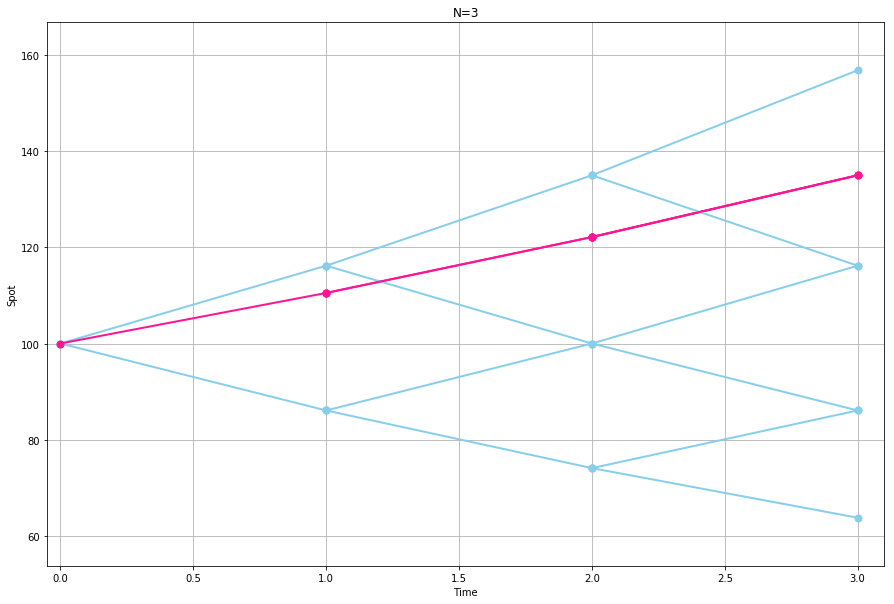

In [4]:
plt.figure(figsize=(15,10))

def pic1(S0, r, T, sigma, N):
    dt, df, u, d, p = model_params(r, T, sigma, N)
    t, S = gen_lattice(S0=S0, N=N, u=u, d=d, dt=dt)
    
    print(f"df: {df}, u:{u}, d:{d}, p:{p}" )

    t1 = np.unique(t)
    print(f"N={N}, size={t1.shape[0]}")
    assert( N+1 == t1.shape[0] )

    B = np.repeat(df, N+1)
    B[0] = S0
    B = np.cumprod(B)
    print(f"B[-1]: {B[-1]}")
    maxS = np.max(S)
    print(f"maxS : {maxS}")
    
    
    L = N+1 #lattice_levels(S)

    k=len(S)-L-1
    for i in reversed(range(1, L)):
        for j in range(0, i):
            for y in (S[k+i], S[k+i+1]):
                plt.plot((i-1, i), (S[k], y), color='skyblue', marker='o', linewidth=2, linestyle="-", markersize=7)
            plt.plot((i-1, i), (B[i-1], B[i]), color='deeppink', marker='o', linewidth=2, linestyle="-", markersize=7)
            k = k - 1
    
    plt.scatter(t1, B, 3, color='deeppink', marker='o')
    axes = plt.gca()
    axes.set_xlim([-0.05,T+0.1])
    axes.set_ylim([np.min(S)-10,np.max(S)+10])
    axes.set_xlabel('Time')
    axes.set_ylabel('Spot')
    plt.title(f"N={N}")
    plt.grid(True)

    plt.show()

pic1(S0, r, T, sigma, N=3)

In [5]:
_, S = gen_lattice(S0, N=3, u=u, d=d, dt=dt)
######

L = 4
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('------')
for i in range(len(S)-L, len(S) ):
    print(S[i])
    
print( '------\n\n')


k=len(S)-L-1 # last index before the last level starts
for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1
    print('---')

levels: 4 len: 10; number of first node on the last level: 6
------
156.83121854901685
116.1834242728283
86.07079764250578
63.76281516217733
------


74.081822 connected to 86.070798 and 63.762815
100.000000 connected to 116.183424 and 86.070798
134.985881 connected to 156.831219 and 116.183424
---
86.070798 connected to 100.000000 and 74.081822
116.183424 connected to 134.985881 and 100.000000
---
100.000000 connected to 116.183424 and 86.070798
---


----------------

# Задача

In [6]:
import sys
print (sys.version)

from enum import Enum
class CallPut(Enum):
    call = 1
    put = 2

class ExerciseStyle(Enum):
    euro = 1
    amer = 2


3.6.3 (v3.6.3:2c5fed8, Oct  3 2017, 18:11:49) [MSC v.1900 64 bit (AMD64)]


In [7]:
def pv_crr(amerEuro, callPut, S0, K, T, r, sigma, N):
    dt, df, u, d, q = model_params(r, T, sigma, N)
    print(f"df: {df}, u:{u}, d:{d}, q:{q}" )
    _, S = gen_lattice(S0=S0, N=N, u=u, d=d, dt=dt)

    L = N+1

    payoff = lambda x: max( 0, x - K ) if CallPut.call == callPut else max( 0, K - x)

    # Calculate payoff at the last lattice level
    ## TODO ##

    # Go backwards, calculate extected value for prev node, based on known nodes
    # Calculate payoff at node k, based on expected value of S
    ## TODO ##
            
    return S[0], S

# parameters
S0 = 100.
T = 1.
r = 0.05
sigma = 0.20
K = 100.
N = 1000

es = ExerciseStyle.euro
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

es = ExerciseStyle.amer
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

df: 1.0000500012500209, u:1.00634459755079, d:0.9936954025825434, p:0.5023717859855448
100.0
df: 1.0000500012500209, u:1.00634459755079, d:0.9936954025825434, p:0.5023717859855448
100.0
df: 1.0000500012500209, u:1.00634459755079, d:0.9936954025825434, p:0.5023717859855448
100.0
df: 1.0000500012500209, u:1.00634459755079, d:0.9936954025825434, p:0.5023717859855448
100.0


-------